# 绘图类型简介

在这里介绍XY折线图，网格框图，曲面图和等高线图

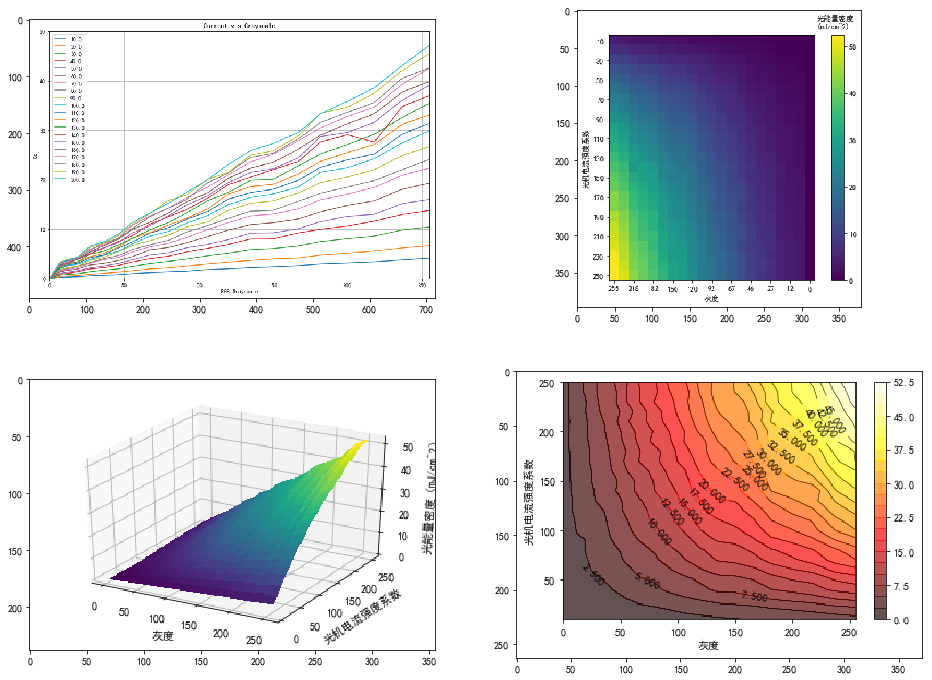

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('IMG/demo-line.png')
img1=mpimg.imread('IMG/demo-grid.png')
img2=mpimg.imread('IMG/demo-surface.png')
img3=mpimg.imread('IMG/demo-contour.png')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes[0,0].imshow(img0)
axes[0,1].imshow(img1)
axes[1,0].imshow(img2)
axes[1,1].imshow(img3)
plt.show()

## 数据介绍

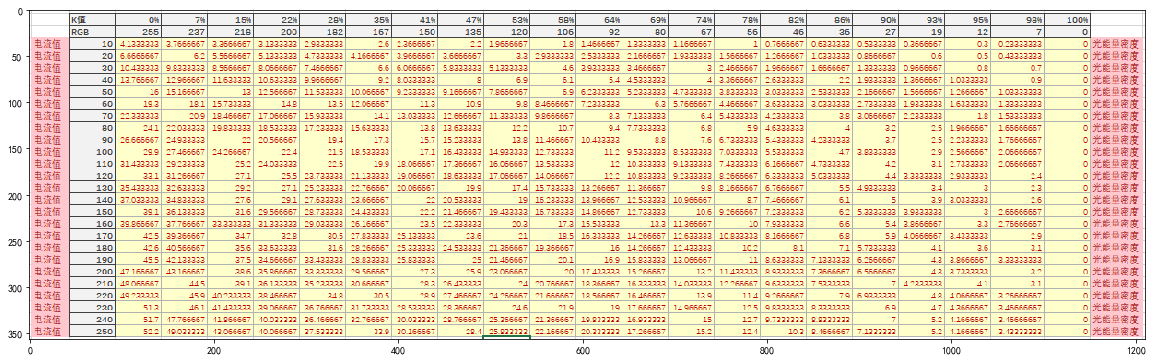

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('IMG/excel-screenshot.png')
fig, axes = plt.subplots(1, 1, figsize=(20, 12))
plt.imshow(img)
plt.show()

## 数据整理

In [20]:
import pandas as pd
import numpy as np

fname = "HD0-250.xlsx"
dfSheet = pd.read_excel(fname, sheet_name="Sheet1",header = None)
dfData = dfSheet.iloc[88:113,3:24] # 提取试验数据
npData = dfData.values # 提取Excel数据，转换成numpy类型数组
npCurrent = dfSheet.iloc[88:113,2].values # 提取Excel电流值数据
npGrayscale = dfSheet.iloc[87,3:24].values # 提取Excel灰度数据
npCurrent = np.reshape(npCurrent,(1,len(npCurrent)))
npGrayscale = np.reshape(npGrayscale,(1,len(npGrayscale)))
# 在数据最前方补零，保证数据维度可以正确合并
npGrayscale_zeropadding = np.hstack(([[0]],npGrayscale)) 
# 将数据和电流值合并，电流值是第一列
npOutput = np.hstack((npCurrent.T,npData)) 
# 将数据和灰度值合并，合并后，灰度值是第一行
npOutput = np.vstack((npGrayscale_zeropadding,npOutput)) 
np.savetxt("data2.txt",npOutput, delimiter = "\t", 
           fmt = "%0.3f", 
           header="Grayscale v.s. Current intensity")

data2 导出数据如下图所示


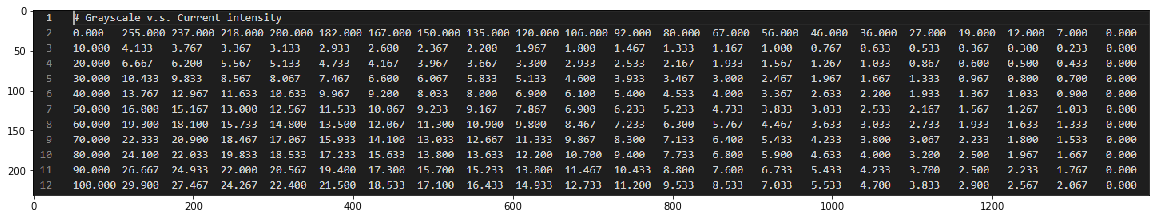

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('IMG/data2-screenshot.png')
fig, axes = plt.subplots(1, 1, figsize=(20, 12))
plt.imshow(img)
plt.show()

## 绘制XY折线图

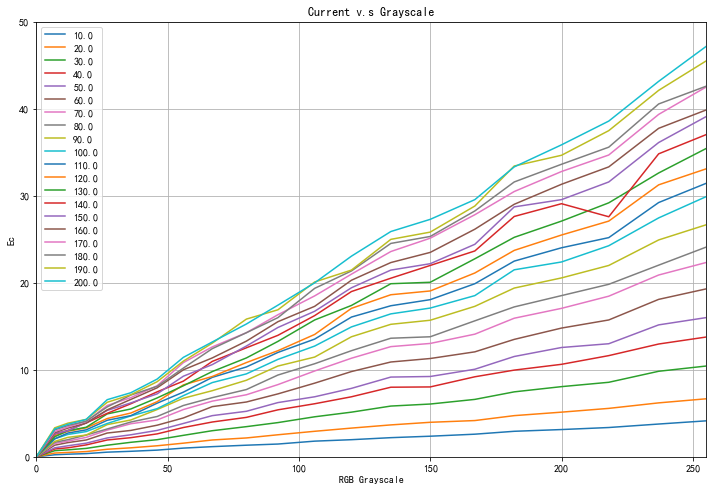

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

npData = np.loadtxt("data2.txt") # 载入所有数据

npCurrent = npData[1:,0]
npGrayscale = npData[0,1:]
npExpData = npData[1:,1:]

plt.subplots(figsize=(12,8))
i = 0
while (i<20):
    plt.plot(npGrayscale, npExpData[i], label=str(npCurrent[i]))
    i = i + 1
    
plt.legend()
plt.title('Current v.s Grayscale')
plt.xlabel('RGB Grayscale')
plt.ylabel('Ec')
plt.xlim([0,255])
plt.ylim([0,50])
plt.grid()
plt.show()

## 绘制网格图

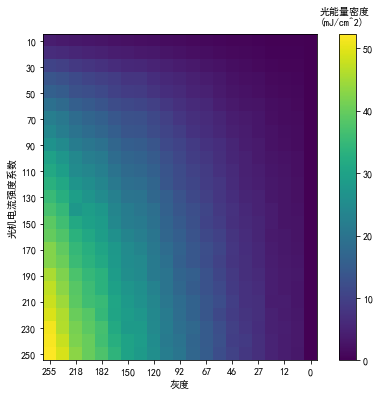

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

npData = np.loadtxt("data2.txt") # 载入所有数据

npCurrent = npData[1:,0]
npGrayscale = npData[0,1:]
npExpData = npData[1:,1:]


# 创建X轴序列数据
npX = np.linspace(0,len(npGrayscale),len(npGrayscale),endpoint = False)
npY = np.linspace(0,len(npCurrent),len(npCurrent),endpoint = False)
npX = npX[::2]
npY = npY[::2]

lstXTickLabel = []
for each in npX:
    lstXTickLabel.append(str(int(npGrayscale[int(each)])))
    
lstYTickLabel = []
for each in npY:
    lstYTickLabel.append(str(int(npCurrent[int(each)])))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
im = ax.imshow(npExpData, cmap='viridis')
ax.set_xlabel("灰度")
ax.set_ylabel("光机电流强度系数")
ax.set_xticks(npX)
ax.set_yticks(npY)
ax.set_xticklabels(lstXTickLabel)
ax.set_yticklabels(lstYTickLabel)
fig.colorbar(im, ax=ax)
fig.text(0.75,0.9,"光能量密度\n(mJ/cm^2)")
plt.show()

#plt.savefig('光机电流和灰度的关系-jupytor.png')

### 绘制3D视图-曲面图

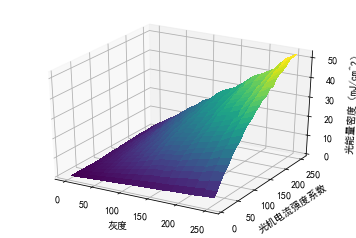

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 31 22:32:44 2019

@author: Ptero
"""

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

npData = np.loadtxt("data2.txt") # 载入所有数据

npCurrent = npData[1:,0]
npGrayscale = npData[0,1:]
npExpData = npData[1:,1:]

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
X, Y = np.meshgrid(npGrayscale, npCurrent)
surf = ax.plot_surface(X, Y, npExpData, 
                       linewidth=0, 
                       antialiased=False, 
                       cmap="viridis")
ax.set_xlabel("灰度")
ax.set_ylabel("光机电流强度系数")
ax.set_zlabel("光能量密度（mJ/cm^2）")

plt.show()

#plt.savefig('光机电流和灰度的关系.png')


3D视图最好用交互式的办法绘制，以获得最佳视角。下面的例子将浮动图片。

如下图所示
<img src="files/IMG/3dplot-auto.png">

In [18]:
%matplotlib auto
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

npData = np.loadtxt("data2.txt") # 载入所有数据

npCurrent = npData[1:,0]
npGrayscale = npData[0,1:]
npExpData = npData[1:,1:]

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
X, Y = np.meshgrid(npGrayscale, npCurrent)
surf = ax.plot_surface(X, Y, npExpData, 
                       linewidth=0, 
                       antialiased=False, 
                       cmap="viridis")
ax.set_xlabel("灰度")
ax.set_ylabel("光机电流强度系数")
ax.set_zlabel("光能量密度（mJ/cm^2）")

plt.show()


Using matplotlib backend: Qt5Agg


运行下面的命令，切换回嵌入图片模式(inline)

In [19]:
%matplotlib inline

## 绘制等高线

matplotlib有两种绘制等高线的函数contourf()和contour(),前者可以着色，后者可以连线。
具体请参考下文例子。

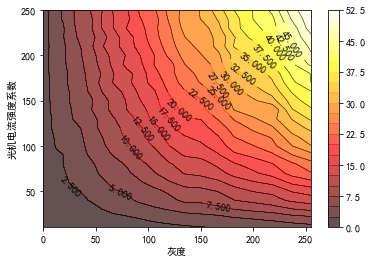

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

npData = np.loadtxt("data2.txt") # 载入所有数据

npCurrent = npData[1:,0]
npGrayscale = npData[0,1:]
npExpData = npData[1:,1:]


fig = plt.figure()
ax = fig.gca()

# 绘制等高线图
X, Y = np.meshgrid(npGrayscale, npCurrent)
# 这里，20是等高线的分层密度，数字越小，等高线越稀疏，反之亦然
C0 = ax.contourf(X, Y, npExpData, 20, alpha=.68, cmap=plt.cm.hot) 
 # 这里，20是等高线的分层密度，数字越小，等高线越稀疏，反之亦然
C = ax.contour(X, Y, npExpData, 20, colors='black', linewidths=0.5)

ax.set_xlabel("灰度")
ax.set_ylabel("光机电流强度系数")
ax.clabel(C, inline=True, fontsize=10)

fig.colorbar(C0, ax=ax) # 显示颜色表

plt.show()

#plt.savefig('光机电流和灰度的关系-等高线-黑白.png')
#plt.savefig('光机电流和灰度的关系-等高线-彩色.png')


## 等高线图-仅连线

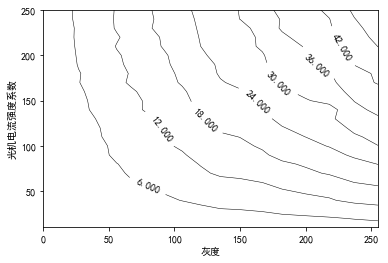

In [5]:
fig = plt.figure()
ax = fig.gca()

# 绘制等高线图
X, Y = np.meshgrid(npGrayscale, npCurrent)
C = ax.contour(X, Y, npExpData, 8, colors='black', linewidths=0.5)
ax.set_xlabel("灰度")
ax.set_ylabel("光机电流强度系数")
ax.clabel(C, inline=True, fontsize=10)

plt.show()

## 等高线图-仅着色

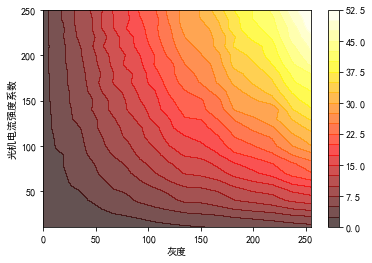

In [14]:
fig = plt.figure()
ax = fig.gca()

# 绘制等高线图
X, Y = np.meshgrid(npGrayscale, npCurrent)
 # 这里，20是等高线的分层密度，数字越小，等高线越稀疏，反之亦然
C0 = ax.contourf(X, Y, npExpData, 20, alpha=.68, cmap=plt.cm.hot)
ax.set_xlabel("灰度")
ax.set_ylabel("光机电流强度系数")

fig.colorbar(C0, ax=ax) # 显示颜色表
plt.show()